In [58]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import csv
import os,random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution1D
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

(505, 2)
(904, 2)
(479, 2)
(552, 2)
(996, 2)
(697, 2)
(561, 2)
(880, 2)
(1134, 2)
(799, 2)
(652, 2)
(591, 2)
(435, 2)
(520, 2)
(948, 2)
(602, 2)
(437, 2)
(928, 2)
(853, 2)
(754, 2)
(599, 2)
(568, 2)
(518, 2)
(507, 2)
(551, 2)
(520, 2)
(570, 2)
(912, 2)
(1094, 2)
(920, 2)
(1135, 2)
(627, 2)
(535, 2)
(417, 2)
(507, 2)
(714, 2)
(444, 2)
(314, 2)
(568, 2)
(838, 2)
(1003, 2)
(783, 2)
(817, 2)
(898, 2)
(1515, 2)
(577, 2)
(621, 2)
(399, 2)
(777, 2)
(526, 2)
(623, 2)
(813, 2)
(2487, 2)
(699, 2)
(288, 2)
here
(288, 2)
(706, 2)
(1222, 2)
(405, 2)
(974, 2)
(1094, 2)
(1003, 2)
(1159, 2)
(596, 2)
(502, 2)
(1221, 2)
(781, 2)
(1543, 2)
(392, 2)
(568, 2)
(459, 2)
(476, 2)
(605, 2)
(499, 2)
(540, 2)
(453, 2)
(658, 2)
(532, 2)
(700, 2)
x_val shape: (78, 700, 2)


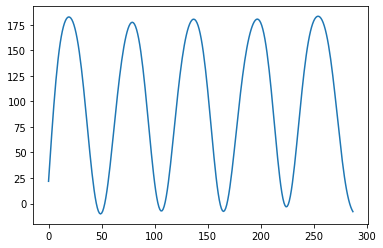

In [71]:
types = {'B_ID':8, 'E_ID':17, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("./po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = np.asarray(temp)
            temp = temp[:,:2].astype(np.float64)
        except:
            print(ids, i)
        print(temp.shape)
        if i==3 and ids == 'S_ID':
            print("here")
            plt.plot(temp[:,1])
            print(temp.shape)
        x_val.append(temp.tolist())
# x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=700)).astype(np.float64)
print("x_val shape:", x_val.shape)
# len(x_val[1][0])

In [60]:
# df = pd.read_excel("./KiMoRe/E_ID1/Es1/Label/ClinicalAssessment_E_ID1.xlsx")
# np.array(df).reshape((16,))
# df
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("./KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
    if len(po_val)==24:
        print(ids)
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
# print(po_val)
for i in range(78):
    if np.isnan(po_val[i]):
        po_val[i] = 0
print(po_val)


/home/yash/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


E_ID16
shape of CF:  (78,)
shape of PO:  (78,)
[15.         12.          9.39439192  7.78382608 13.         15.
  8.         14.33333333 14.66666667 14.33333333 13.33333333 14.
 14.33333333 15.         15.         14.66666667 15.         15.
 15.         15.         15.         15.         15.         15.
  0.         12.66666667 14.33333333 15.         14.33333333 13.
 14.         15.         15.         15.          7.         15.
 15.         15.         15.         12.         15.         13.
 13.         15.         13.         14.         14.         10.
 15.         13.         15.         15.          3.         11.
 15.          6.          7.58350731  8.41349572  6.33333333 11.
  6.33333333 10.         13.          9.         15.          7.
  6.         15.          7.          8.         15.         12.83313884
  5.66666667 10.33333333 11.66666667 15.          9.         14.66666667]


In [19]:
# plt.plot(x_val[0][:][1])
x_val[0][:][]

[[21.225, 13.998]]

In [72]:
def Network():
    model = Sequential()
    model.add(Convolution1D(60, 5, padding ='same', strides = 2, input_shape = (timesteps,n_dim)))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(30, 3, padding ='same', strides = 2))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(10, 3, padding ='same'))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(200))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(100))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer=Adam())
    
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    t = now()
    history = model.fit(x_train, y_train, batch_size=5, epochs=200, verbose=1, 
                     validation_data=(x_test, y_test),
                     callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
    plt.savefig('../../Results/CNN_Vicon_Scores.png', dpi=300)
    plt.show()
    
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-y_test)
    # Cumulative deviation
    mean_abs_dev = np.mean(test_dev)
    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Epoch 1/200
11/11 [==============================] - 1s 24ms/step - loss: -3565.4336 - val_loss: -46427.0000
Epoch 2/200
11/11 [==============================] - 0s 13ms/step - loss: -116669.4046 - val_loss: -670164.9375
Epoch 3/200
11/11 [==============================] - 0s 11ms/step - loss: -1224351.4375 - val_loss: -5433838.5000
Epoch 4/200
11/11 [==============================] - 0s 13ms/step - loss: -8610934.6875 - val_loss: -30409568.0000
Epoch 5/200
11/11 [==============================] - 0s 12ms/step - loss: -46129660.6667 - val_loss: -133243672.0000
Epoch 6/200
11/11 [==============================] - 0s 13ms/step - loss: -175461470.6667 - val_loss: -477046432.0000
Epoch 7/200
11/11 [==============================] - 0s 13ms/step - loss: -643697829.3333 - val_loss: -1475143808.0000
Epoch 8/200
11/11 [==============================] - 0s 11ms/step - loss: -1701638890.6667 - val_loss: -3981506816.0000
Epoch 9/200
11/11 [==============================] - 0s 13ms/step - loss: -4

Epoch 65/200
11/11 [==============================] - 0s 20ms/step - loss: -14965348075831296.0000 - val_loss: -16063289356189696.0000
Epoch 66/200
11/11 [==============================] - 0s 16ms/step - loss: -15178505065769642.0000 - val_loss: -17653590118105088.0000
Epoch 67/200
11/11 [==============================] - 0s 21ms/step - loss: -17393188129996800.0000 - val_loss: -19399244142084096.0000
Epoch 68/200
11/11 [==============================] - 0s 19ms/step - loss: -19770647859866284.0000 - val_loss: -21282275916251136.0000
Epoch 69/200
11/11 [==============================] - 0s 22ms/step - loss: -17784365161381888.0000 - val_loss: -23243841167425536.0000
Epoch 70/200
11/11 [==============================] - 0s 24ms/step - loss: -22725192370006700.0000 - val_loss: -25474028705677312.0000
Epoch 71/200
11/11 [==============================] - 0s 17ms/step - loss: -22987777185764692.0000 - val_loss: -27790018953084928.0000
Epoch 72/200
11/11 [==============================] - 0

Epoch 125/200
11/11 [==============================] - 0s 11ms/step - loss: -693852986007704960.0000 - val_loss: -773846385391828992.0000
Epoch 126/200
11/11 [==============================] - 0s 13ms/step - loss: -750285740994199552.0000 - val_loss: -809069790143447040.0000
Epoch 127/200
11/11 [==============================] - 0s 14ms/step - loss: -780677771394285568.0000 - val_loss: -845793066194305024.0000
Epoch 128/200
11/11 [==============================] - 0s 11ms/step - loss: -810140262065678976.0000 - val_loss: -883797067133091840.0000
Epoch 129/200
11/11 [==============================] - 0s 20ms/step - loss: -759432993405840000.0000 - val_loss: -921576905138765824.0000
Epoch 130/200
11/11 [==============================] - 0s 21ms/step - loss: -851122072636620800.0000 - val_loss: -961417296654368768.0000
Epoch 131/200
11/11 [==============================] - 0s 14ms/step - loss: -967026827453966976.0000 - val_loss: -1004306359035887616.0000
Epoch 132/200
11/11 [============

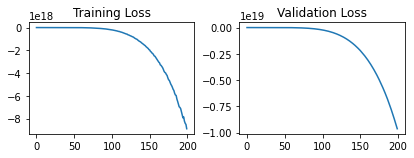

FileNotFoundError: [Errno 2] No such file or directory: '../../Results/CNN_Vicon_Scores.png'

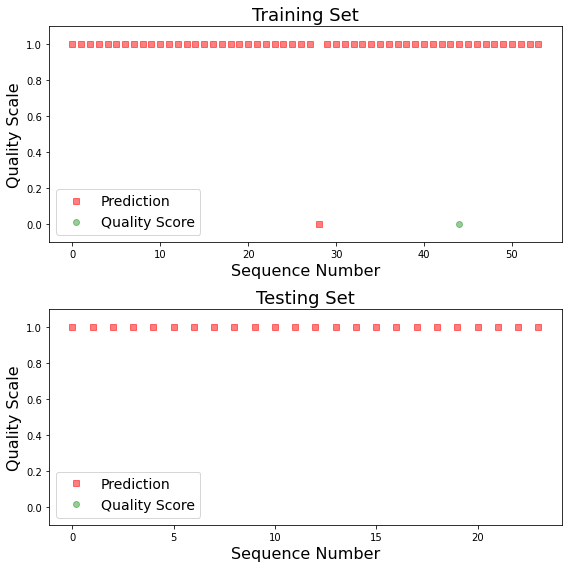

In [73]:
Mean_abs_dev, RMS_dev  = Network()

In [65]:
timesteps = 700 # Number of timesteps
nr = 78   # Number of repetitions
n_dim = 2  # Dimension of data sequences
dropout_rate = 0.2   # Droput rate

In [108]:
input1 = Input(shape = (None,), name = 'ip1')
embed1 = layers.Embedding(2501, 5, mask_zero = True)(input1)
encoded_input1 = layers.LSTM(32)(embed1)

input2 = Input(shape = (None,), name = 'ip2')
embed2 = layers.Embedding(2501, 5, mask_zero = True)(input2)
encoded_input2 = layers.LSTM(32)(embed2)
# concatenated = layers.Average()([encoded_input1, encoded_input2])

concatenated = layers.concatenate([encoded_input1, encoded_input2], axis = 1)
print(concatenated.shape)
output = layers.Dense(1,activation='softmax')(concatenated)


model = Model([input1, input2], output);
model.compile(optimizer='adam',
loss='mse',
metrics=['acc'])
model.summary()

(None, 64)
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ip1 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
ip2 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, None, 5)      12505       ip1[0][0]                        
__________________________________________________________________________________________________
embedding_43 (Embedding)        (None, None, 5)      12505       ip2[0][0]                        
________________________________________________________________________________

In [61]:
# x_val /= np.max(np.abs(x_val))
# po_val /= np.max(np.abs(po_val))
x_train, x_test, y_train, y_test = train_test_split(x_val,po_val, test_size=0.3)
print(y_train)

[ 9.          6.         14.66666667 15.          7.          7.
 11.66666667 15.         11.         15.          9.         14.33333333
 15.         13.         15.          7.         14.33333333 15.
 15.         13.         10.33333333  3.         14.33333333 15.
 14.66666667 15.          7.78382608 15.          6.         10.
 15.         14.         15.          8.         15.         14.
 15.         13.          9.39439192 15.         15.         12.83313884
 15.         12.          0.         14.66666667 15.          8.
 14.33333333  5.66666667 15.         12.         10.         15.        ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

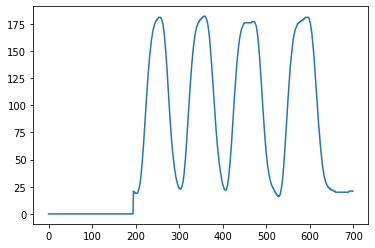

In [63]:
plt.plot(x_val[0,:,:1])

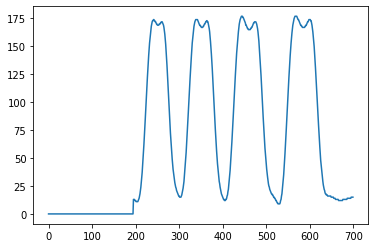

In [64]:
plt.plot(x_val[0,:,1:])

In [113]:
history = model.fit([x_train[:,:,0], x_train[:,:,1]], y_train,epochs=100, validation_split=0.2)

Epoch 1/100


InvalidArgumentError:  indices[15,1971] = -1 is not in [0, 2501)
	 [[node model_18/embedding_43/embedding_lookup (defined at <ipython-input-113-2fa617c1a1f4>:1) ]] [Op:__inference_train_function_231469]

Errors may have originated from an input operation.
Input Source operations connected to node model_18/embedding_43/embedding_lookup:
 model_18/embedding_43/embedding_lookup/226416 (defined at /usr/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


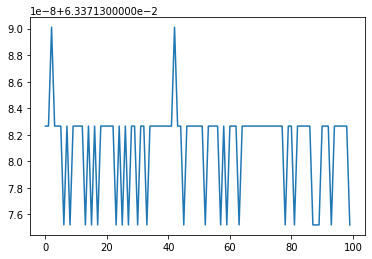

In [102]:
plt.plot(history.history['loss'])

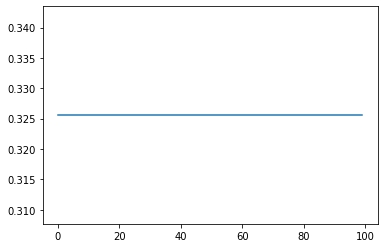

In [103]:
plt.plot(history.history['acc'])

In [104]:
y_pred = model.predict([x_test[:,:,0],x_test[:,:,1]])
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)